<a href="https://colab.research.google.com/github/vasuans/Tensorflow-Projects/blob/master/Linear_Classification_using_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Tensorflow**

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0


**Loading data from sklearn datasets**

In [0]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [0]:
type(data)

sklearn.utils.Bunch

**Data type Bunch works like a Dictionary. As this is having data type Bunch lets look at the keys of data**

In [0]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [0]:
data.data.shape

(569, 30)

In [0]:
data.target.shape

(569,)

In [0]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size =0.33)

In [0]:
N, D = X_train.shape

**Scaling the Data. This is important for Deep learning as one input can't be large(ex: 1 milion) and other input in small(ex: 0.001). So Sklearn provides an option to Normalize the data.**

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
scaler = StandardScaler()

In [0]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
# Tensorflow
model = tf.keras.models.Sequential([
tf.keras.layers.Input(shape = (D,)),
tf.keras.layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
#Train the model
r = model.fit(X_train,y_train,validation_data = (X_test,y_test),epochs = 100)

print ("Train Score: ",model.evaluate(X_train,y_train))
print ("Train Score: ",model.evaluate(X_test,y_test))

Epoch 1/100
12/12 [==============================] - 0s 16ms/step - loss: 0.7623 - accuracy: 0.4619 - val_loss: 0.7071 - val_accuracy: 0.6436
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: 0.6888 - accuracy: 0.5906 - val_loss: 0.6434 - val_accuracy: 0.7021
Epoch 3/100
12/12 [==============================] - 0s 4ms/step - loss: 0.6233 - accuracy: 0.6798 - val_loss: 0.5904 - val_accuracy: 0.7819
Epoch 4/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5718 - accuracy: 0.7480 - val_loss: 0.5449 - val_accuracy: 0.8085
Epoch 5/100
12/12 [==============================] - 0s 4ms/step - loss: 0.5273 - accuracy: 0.7953 - val_loss: 0.5068 - val_accuracy: 0.8564
Epoch 6/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4897 - accuracy: 0.8189 - val_loss: 0.4747 - val_accuracy: 0.8723
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.4590 - accuracy: 0.8425 - val_loss: 0.4463 - val_accuracy: 0.8936
Epoch 8/100


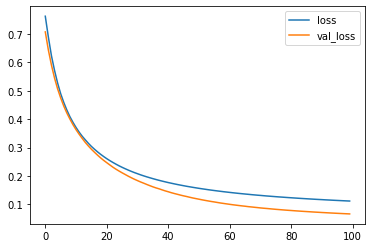

In [41]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()